# Inspect K80_cifar_b128_metrics.csv file

#### Profiled with
```
$ ./profile_cifar.sh --csv --log-file K80_cifar_b128_metrics.csv --metrics "flop_dp_efficiency,flop_sp_efficiency,
achieved_occupancy,alu_fu_utilization,
eligible_warps_per_cycle,flop_count_dp,flop_count_sp,
inst_per_warp,ipc,issue_slot_utilization,issue_slots,issued_ipc"
```

<pre style="font-size:6pt;line-height:100%;background-color:#eee;">
==12508== NVPROF is profiling process 12508, command: python chainer/examples/cifar/train_cifar.py -d cifar100 -g 0 -b 128 -e 1
==12508== Some kernel(s) will be replayed on device 0 in order to collect all events/metrics.
==12508== Profiling application: python chainer/examples/cifar/train_cifar.py -d cifar100 -g 0 -b 128 -e 1
</pre>

In [1]:
%matplotlib inline
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os.path
import datetime
from cycler import cycler
import pandas as pd

In [2]:
nvprof_file = "K80_cifar_b128_metrics.csv"

In [3]:
nvprof = pd.read_csv(nvprof_file, header=[0], skiprows=[0,1,2,3,4])
nvprof.iloc[:3]

,Device,Kernel,Invocations,Metric Name,Metric Description,Min,Max,Avg
0,Tesla K80 (0),cudnn_convolve_sgemm_sm35_ldg_nn_64x16x64x16x16,1,flop_dp_efficiency,FLOP Efficiency(Peak Double),0.100918%,0.100918%,0.100918%
1,Tesla K80 (0),cudnn_convolve_sgemm_sm35_ldg_nn_64x16x64x16x16,1,flop_sp_efficiency,FLOP Efficiency(Peak Single),38.786015%,38.786015%,38.786015%
2,Tesla K80 (0),cudnn_convolve_sgemm_sm35_ldg_nn_64x16x64x16x16,1,achieved_occupancy,Achieved Occupancy,0.565822,0.565822,0.565822


In [4]:
pat = re.compile("[0-9\.]+")
# Extract float number from a string
def parseFloat(str):
    global pat
    f = pat.search(str)
    if f is not None:
        d = float(f.group())
        return d
    return None

In [5]:
nvprof.iloc[:,5:8] = nvprof.iloc[:,5:8].applymap(parseFloat)
nvprof.iloc[:10]

,Device,Kernel,Invocations,Metric Name,Metric Description,Min,Max,Avg
0,Tesla K80 (0),cudnn_convolve_sgemm_sm35_ldg_nn_64x16x64x16x16,1,flop_dp_efficiency,FLOP Efficiency(Peak Double),1.009180e-01,1.009180e-01,1.009180e-01
1,Tesla K80 (0),cudnn_convolve_sgemm_sm35_ldg_nn_64x16x64x16x16,1,flop_sp_efficiency,FLOP Efficiency(Peak Single),3.878601e+01,3.878601e+01,3.878601e+01
2,Tesla K80 (0),cudnn_convolve_sgemm_sm35_ldg_nn_64x16x64x16x16,1,achieved_occupancy,Achieved Occupancy,5.658220e-01,5.658220e-01,5.658220e-01
3,Tesla K80 (0),cudnn_convolve_sgemm_sm35_ldg_nn_64x16x64x16x16,1,alu_fu_utilization,Arithmetic Function Unit Utilization,7.000000e+00,7.000000e+00,7.000000e+00
4,Tesla K80 (0),cudnn_convolve_sgemm_sm35_ldg_nn_64x16x64x16x16,1,eligible_warps_per_cycle,Eligible Warps Per Active Cycle,5.768287e+00,5.768287e+00,5.768287e+00
5,Tesla K80 (0),cudnn_convolve_sgemm_sm35_ldg_nn_64x16x64x16x16,1,flop_count_dp,Floating Point Operations(Double Precision),5.242880e+05,5.242880e+05,5.242880e+05
6,Tesla K80 (0),cudnn_convolve_sgemm_sm35_ldg_nn_64x16x64x16x16,1,flop_count_sp,Floating Point Operations(Single Precision),6.045041e+08,6.045041e+08,6.045041e+08
7,Tesla K80 (0),cudnn_convolve_sgemm_sm35_ldg_nn_64x16x64x16x16,1,inst_per_warp,Instructions per warp,3.324200e+04,3.324200e+04,3.324200e+04
8,Tesla K80 (0),cudnn_convolve_sgemm_sm35_ldg_nn_64x16x64x16x16,1,ipc,Executed IPC,4.415707e+00,4.415707e+00,4.415707e+00
9,Tesla K80 (0),cudnn_convolve_sgemm_sm35_ldg_nn_64x16x64x16x16,1,issue_slot_utilization,Issue Slot Utilization,7.179330e+01,7.179330e+01,7.179330e+01


In [6]:
def plotDistribution(df,metric):
    rot = 30
    bins = 100
    dfm = df[df["Metric Name"] == metric]
    cols = [0,3,4]
    #dfm.drop(dfm.columns[cols], axis=1, inplace=True)
    plt.rcParams['figure.figsize'] = 10,2.5    
    fig, axarr = plt.subplots(1,3)
    fig.suptitle(metric,y=1.08)
    #labels = axarr[1].get_xticklabels()
    #plt.setp(labels, rotation=60, fontsize=10)
    #labels = axarr[2].get_xticklabels()
    #plt.setp(labels, rotation=60, fontsize=10)
    dfm.hist(column="Max", ax=axarr[0], xrot=rot, bins=bins)
    dfm.hist(column="Avg", ax=axarr[1], xrot=rot, bins=bins)
    dfm.hist(column="Min", ax=axarr[2], xrot=rot, bins=bins)
    axarr[0].grid('on', alpha=0.5, ls=":" )
    axarr[1].grid('on', alpha=0.5, ls=":" )
    axarr[2].grid('on', alpha=0.5, ls=":" )
#     fig.canvas.draw()
#     labels = axarr[0].get_xticklabels()
#     axarr[0].set_xticklabels(labels, rotation=40, ha='right')
#     labels = axarr[1].get_xticklabels()
#     axarr[1].set_xticklabels(labels, rotation=40, ha='right')
#     labels = axarr[2].get_xticklabels()
#     axarr[2].set_xticklabels(labels, rotation=40, ha='right')
    #print dfm.columns
    ax = dfm.plot.scatter(x="Invocations",y='Max',label="Max",color="#ff9090")
    dfm.plot.scatter(x="Invocations",y='Min',ax=ax, color = '#a0caff',label ='Min',alpha=0.9)
    dfm.plot.scatter(x="Invocations",y='Avg',ax=ax, color = '#7a707a',label ='Avg',alpha=0.8)
     
    ax.set_facecolor("#fcfcff")
    ax.set_ylabel(metric)
    ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(10))
    ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(10))
    ax.xaxis.set_minor_locator(matplotlib.ticker.MaxNLocator(50))
    #ax.set_yscale("log", nonposy='clip')
    ax.set_xlim(left=0)
    ax.grid('on', alpha=0.3, ls=":" )

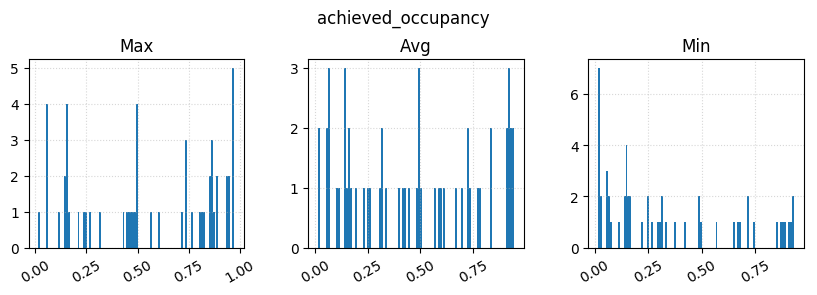

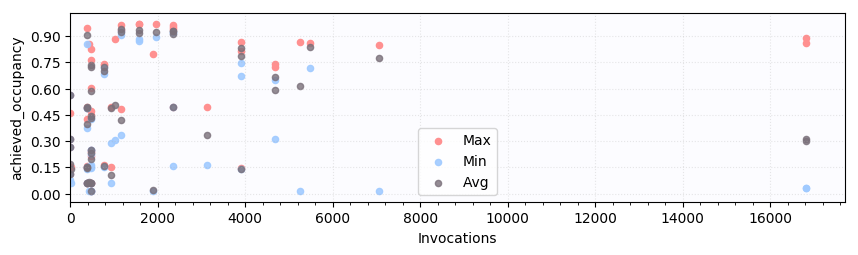

In [7]:
plotDistribution(nvprof,"achieved_occupancy")

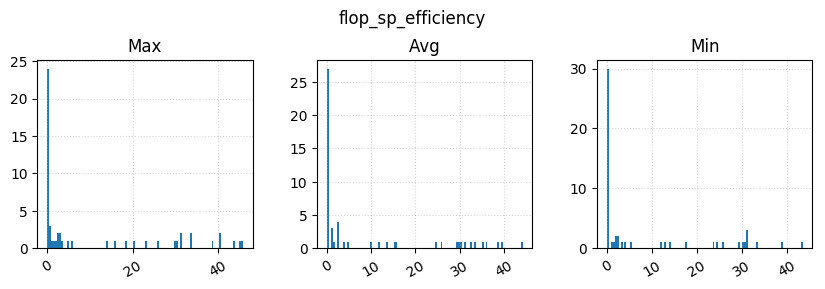

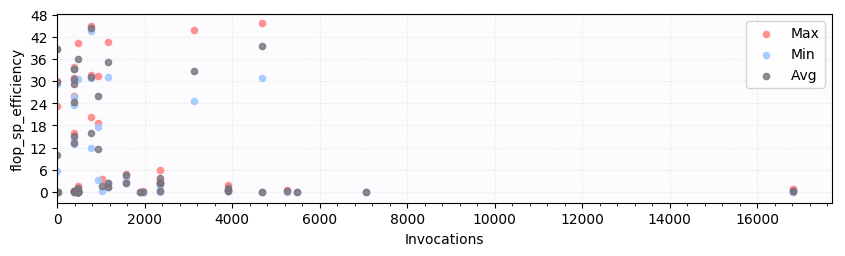

In [8]:
plotDistribution(nvprof,"flop_sp_efficiency")

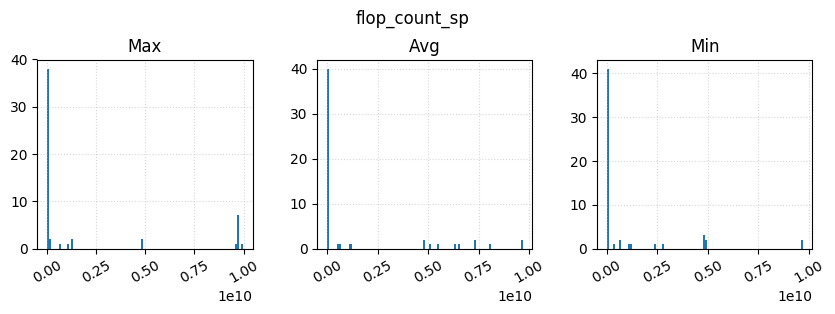

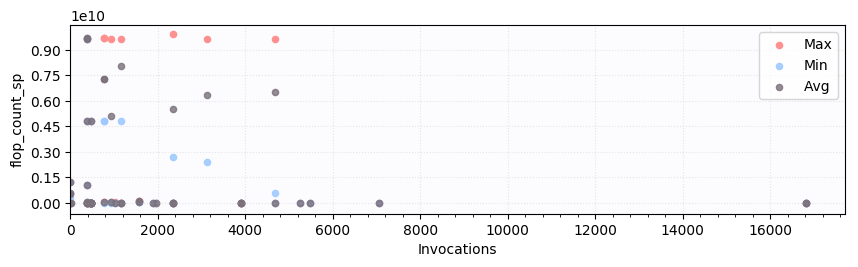

In [9]:
plotDistribution(nvprof,"flop_count_sp")

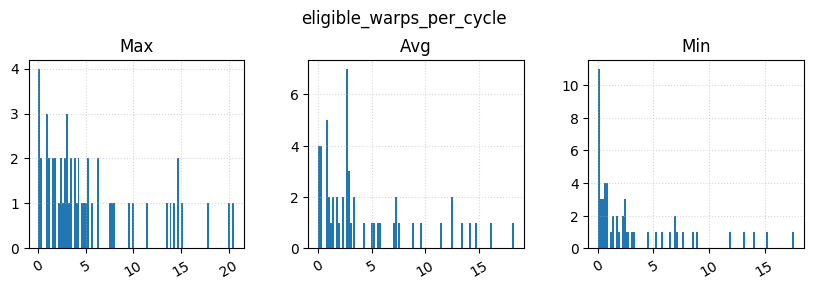

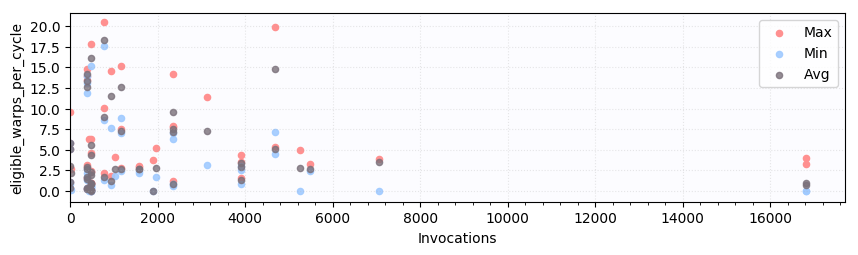

In [10]:
# Average number of warps that are eligible to issue per active cycle
plotDistribution(nvprof,"eligible_warps_per_cycle")

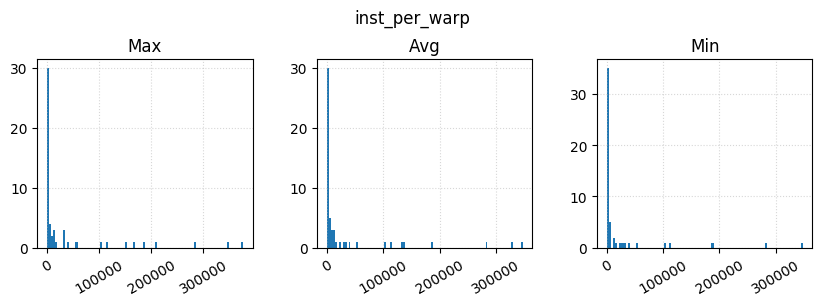

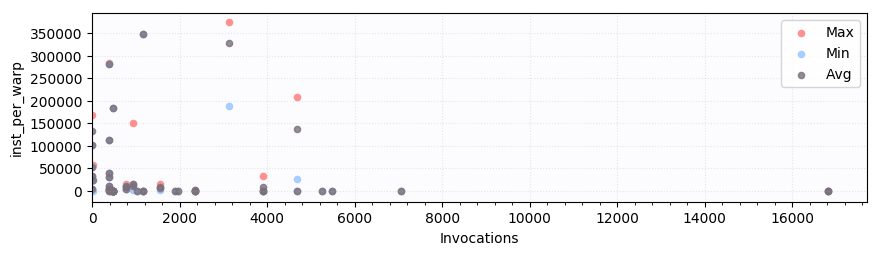

In [11]:
# Average number of instructions executed by each warp
plotDistribution(nvprof,"inst_per_warp")

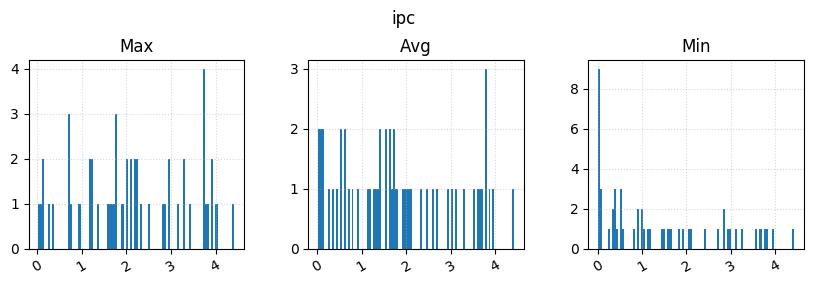

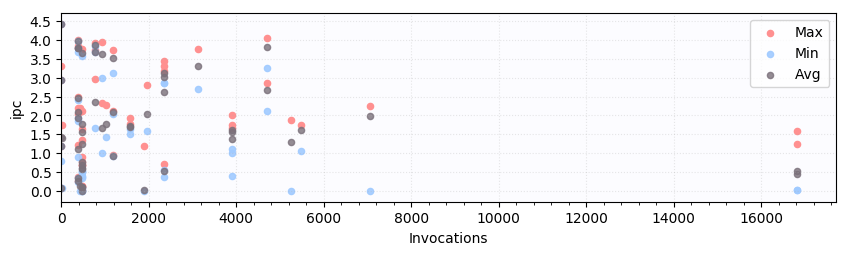

In [12]:
# Instructions executed per cycle
plotDistribution(nvprof,"ipc")

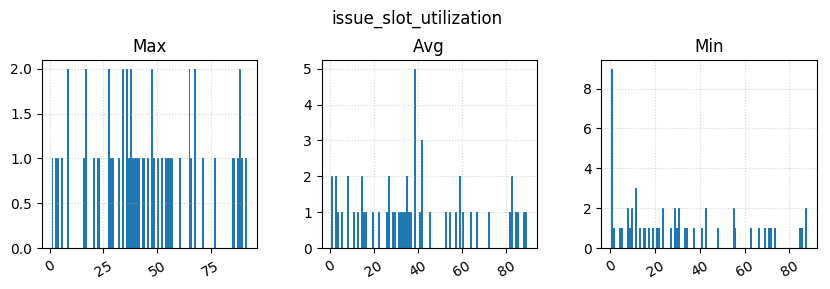

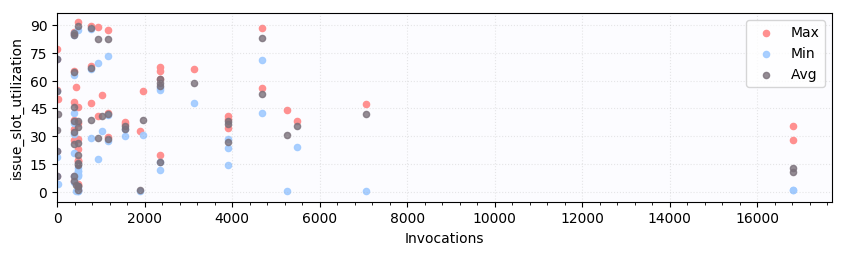

In [13]:
plotDistribution(nvprof,"issue_slot_utilization")

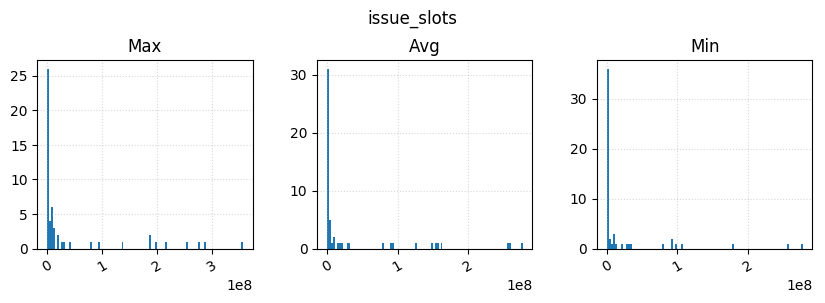

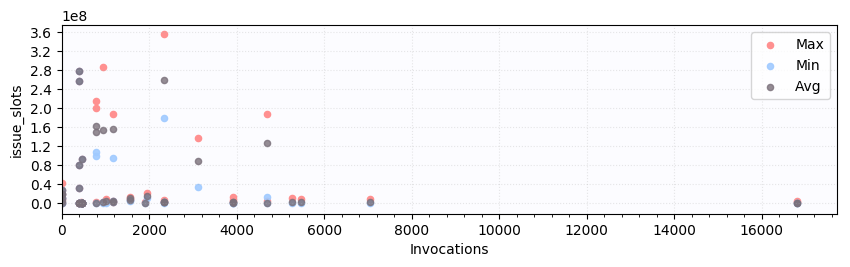

In [14]:
plotDistribution(nvprof,"issue_slots")

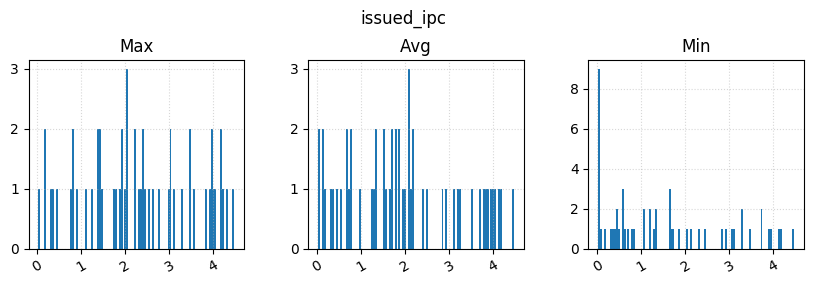

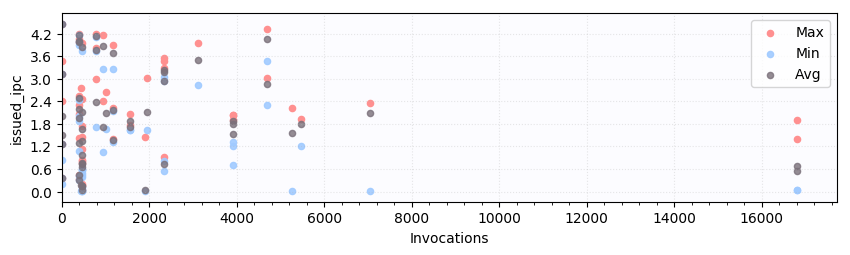

In [15]:
plotDistribution(nvprof,"issued_ipc")

Metric Name
achieved_occupancy          AxesSubplot(0.125,0.125;0.775x0.755)
alu_fu_utilization          AxesSubplot(0.125,0.125;0.775x0.755)
eligible_warps_per_cycle    AxesSubplot(0.125,0.125;0.775x0.755)
flop_count_dp               AxesSubplot(0.125,0.125;0.775x0.755)
flop_count_sp               AxesSubplot(0.125,0.125;0.775x0.755)
flop_dp_efficiency          AxesSubplot(0.125,0.125;0.775x0.755)
flop_sp_efficiency          AxesSubplot(0.125,0.125;0.775x0.755)
inst_per_warp               AxesSubplot(0.125,0.125;0.775x0.755)
ipc                         AxesSubplot(0.125,0.125;0.775x0.755)
issue_slot_utilization      AxesSubplot(0.125,0.125;0.775x0.755)
issue_slots                 AxesSubplot(0.125,0.125;0.775x0.755)
issued_ipc                  AxesSubplot(0.125,0.125;0.775x0.755)
Name: Max, dtype: object

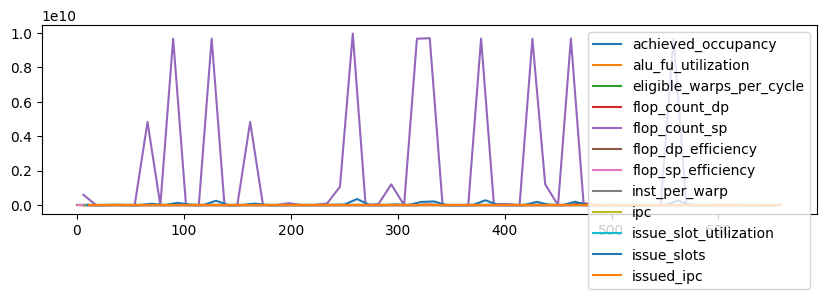

In [16]:
gr = nvprof.groupby("Metric Name")["Max"]
gr.plot(x="Invocations",legend=True)

In [17]:
dfm = nvprof[nvprof["Metric Name"] == "inst_per_warp"]
print dfm["Min"].min()
dfm[dfm["Min"] < 50].count()

18.0


Device                15
Kernel                15
Invocations           15
Metric Name           15
Metric Description    15
Min                   15
Max                   15
Avg                   15
dtype: int64